In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

from mpl_toolkits.axes_grid1 import make_axes_locatable
from mpl_toolkits.axes_grid1.inset_locator import inset_axes


#Badlands
import utils.morphoGrid as morph
# from scripts import morphoGrid_sl as morph_sl
import utils.morphoGrid_noflex as morphnf# from scripts import morphoGrid_sl as morph_sl




In [3]:
#loading simulations
sim=['/live/share/Badlands_simulations/Delta_2020/Delta_running/Synthetic/Delta_SL0_Te50/h5',
    '/live/share/Badlands_simulations/Delta_2020/Delta_running/IH_GH/Delta_SL_GH_Te50/h5',
     '/live/share/Badlands_simulations/Delta_2020/Delta_running/IH_GH/Delta_SL_IH_Te50/h5']


In [4]:
GOM=pd.read_csv ('data/Frederick_EPSL_Dip_Data.csv',sep=',', header=0)
GOM.columns

subsidence_rates=pd.read_csv ('data/subsidence_rates_faults_sadler.csv',sep=',',  header=0)


In [5]:
seqs=[GOM.Seq_2_Top_m, GOM.Seq_3_Top_m, GOM.Seq_4_Top_m, GOM.Seq_5_Top_m, GOM.Seq_6_Top_m, GOM.Seq_7_Top_m, GOM.Seq_8_Top_m]

seqs_rates=[GOM.Seq_2_rate_mm_yr, GOM.Seq_3_rate_mm_yr, GOM.Seq_4_rate_mm_yr, GOM.Seq_5_rate_mm_yr, GOM.Seq_6_rate_mm_yr, GOM.Seq_7_rate_mm_yr, GOM.Seq_8_rate_mm_yr]

seq_duration=[0.58, 1.02, 1.22, 1.63, 1.93, 2.39, 3.13]

nfile=119

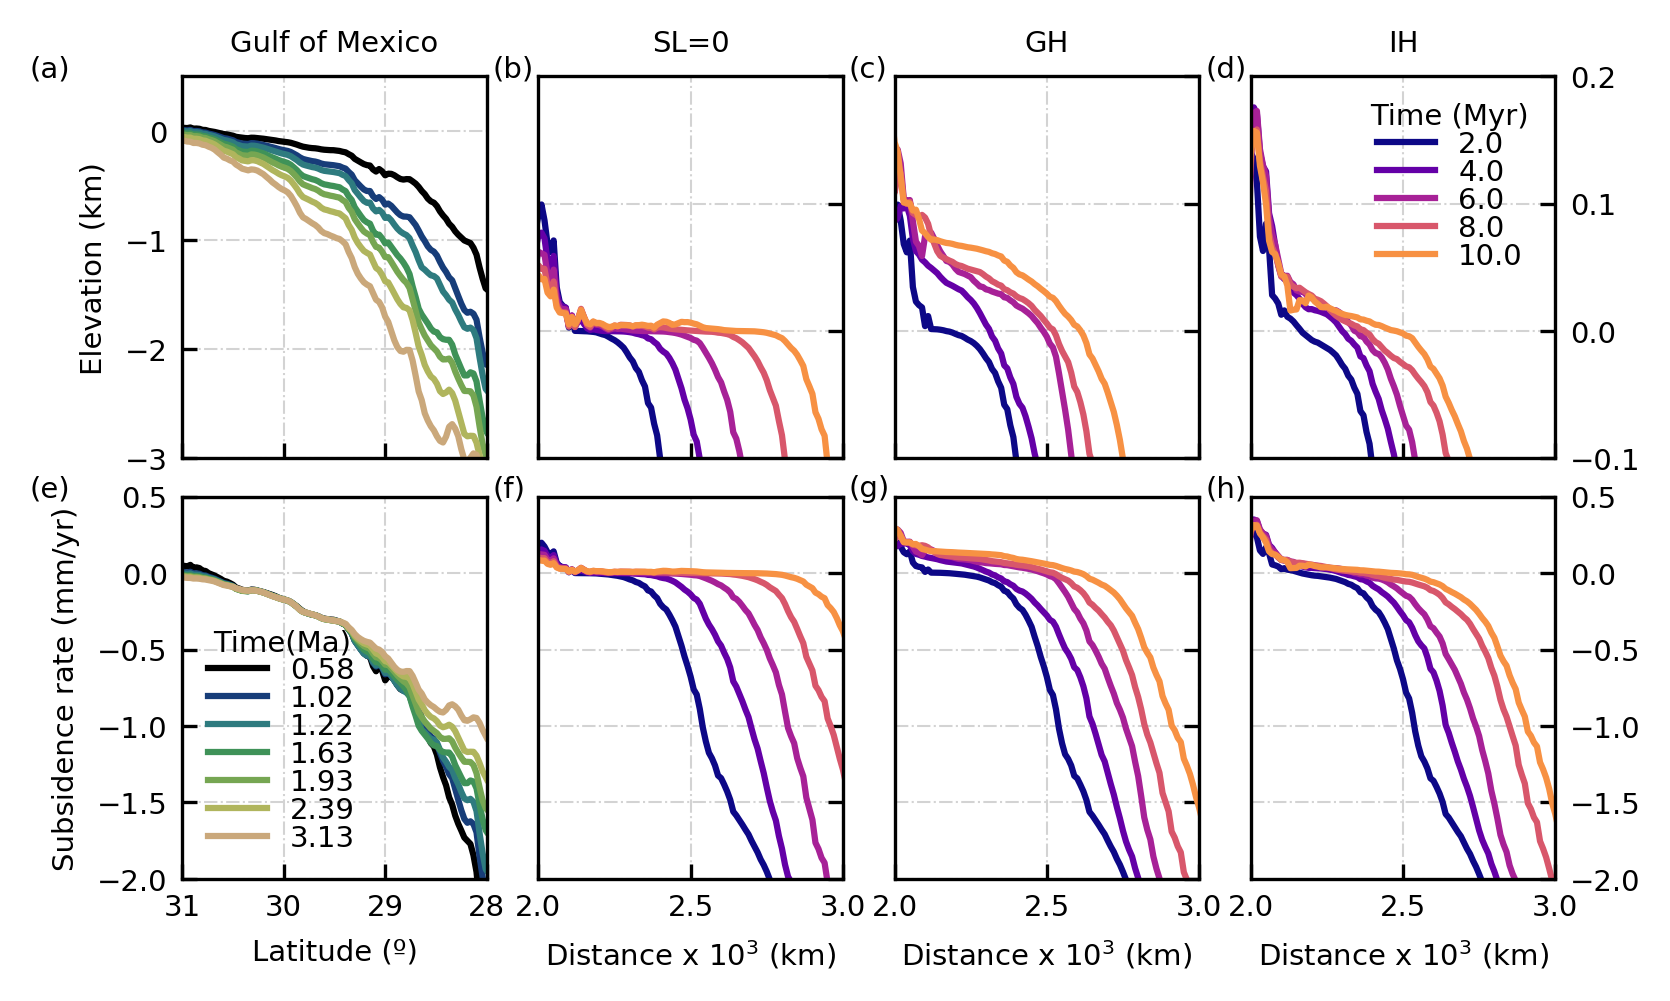

In [8]:
nrows=2; ncols=4
fig, axes = plt.subplots(nrows=nrows,ncols=ncols, figsize=((15/2.54), (9/2.54)), dpi=300)
plt.rcParams['pdf.fonttype'] = 42; plt.rcParams['ps.fonttype'] = 42; plt.rc("font", size=7)

########
#Models#
########
# colormap = plt.cm.gist_earth_r
# color=[colormap(i) for i in np.linspace(0, 1, nfile-10)]
# c = np.linspace(0, 1, nfile-10)
# norm = mpl.colors.Normalize(vmin=c.min(), vmax=c.max())
# cmap = mpl.cm.ScalarMappable(norm=norm, cmap=plt.cm.plasma_r)
# cmap.set_array([])
# color=[plt.cm.plasma_r(i) for i in np.linspace(0, 1.5, 12)]

colormap = plt.cm.plasma
color=[colormap(i) for i in np.linspace(0, 1, nfile-10)]

c = np.linspace(0, 1, nfile-10)
norm = mpl.colors.Normalize(vmin=c.min(), vmax=c.max())
cmap = mpl.cm.ScalarMappable(norm=norm, cmap=plt.cm.plasma)
cmap.set_array([])

column_title=['Gulf of Mexico', 'SL=0','GH', 'IH']

ub=150 #Upstream boundary
db=350 #Downstream boundary
xs_i=100#index at which the cross-section is plotted
initial_step=19
final_step=119

for i in np.arange(0,3,1):                 
    for step in np.arange(20,nfile,20):
        morpho = morph.morphoGrid(sim[i],dx=1e4)
        morpho.loadHDF5(timestep=step)
#         axes.flatten()[i].plot(morpho.x[xs_i,ub:db]/1e6, morpho.flexure[xs_i,ub:db], color=color[step-20])  
        axes.flatten()[i+1].plot(morpho.x[xs_i,ub:db]/1e6, morpho.z[xs_i,ub:db]/1e3, color=color[step-20], label=step/10)  
        axes.flatten()[i+ncols+1].plot(morpho.x[xs_i,ub:db]/1e6, morpho.z[xs_i,ub:db]/500, color=color[step-20], label=final_step-step)        

#####
#GOM#
#####
color=[plt.cm.gist_earth(i) for i in np.linspace(0, 1.5, 12)]

for i in np.arange(0,len(seqs),1):
    axes.T.flatten()[0].plot(GOM.Lat, seqs[i]/1e3, color=color[i], label= str(seq_duration[i]))

for i in np.arange(0,len(seqs),1):
    axes.T.flatten()[1].plot(GOM.Lat, seqs[i]/(seq_duration[i]*1e3), color=color[i], label= str(seq_duration[i]))


        
############
#Formatting# 
############
abc=['(a)', '(b)', '(c)', '(d)', '(e)', '(f)', '(g)', '(h)']
xabc=[32.5,1.85,1.85,1.85]
yabc=[0.5, 0.2,0.2,0.2]

for i in np.arange(0,nrows*ncols,1):
    axes.T.flatten()[i].grid(color='lightgrey', linestyle='-.', linewidth=0.5)
    axes.T.flatten()[i].tick_params(direction= 'in')
    if i==0:
        axes.T.flatten()[i].set_ylabel('Elevation (km)')
        axes.T.flatten()[i].set_xlim(31,28)
        axes.T.flatten()[i].set_ylim(-3,0.5)
    if i==1:
        axes.T.flatten()[i].set_xlabel('Latitude (º)')
        axes.T.flatten()[i].set_ylabel('Subsidence rate (mm/yr)')
        axes.T.flatten()[i].set_xlim(31,28)
        axes.T.flatten()[i].set_ylim(-2,0.5)
    if i>=2 and i<=5:
         axes.T.flatten()[i].set_yticklabels([]) 
    if i>=5 and i<=7:
        axes.flatten()[i].set_xlabel('Distance x $10^3$ (km)')
    if i>=2 and i<=7:
        axes.T.flatten()[i].yaxis.tick_right()
        axes.T.flatten()[i].set_xlim(2,3)
    if i>=1 and i<=3:
        axes.flatten()[i].set_ylim(-0.1,0.2)
    # First row
    if i<ncols:
        axes.flatten()[i].set_title(column_title[i], fontsize=7)
        axes.flatten()[i].set_xticklabels([]) 
        axes.flatten()[i].text(xabc[i], yabc[i], abc[i])

    #second row
    if i>=ncols:
        axes.flatten()[i].set_ylim(0.5, -2)
        axes.flatten()[i].invert_yaxis()
        axes.flatten()[i].text(xabc[i-ncols], 0.5, abc[i])

axes.T.flatten()[1].legend(labelspacing = 0, title='Time(Ma)', fontsize=7,frameon=False)      
axes.flatten()[3].legend(labelspacing = 0, title='Time (Myr)',fontsize=7,frameon=False) 


plt.subplots_adjust(hspace=0.1, wspace=0.17)
# plt.tight_layout()

fig.savefig('./images/egusphere-2023-53_Fig11.pdf', dpi=300)


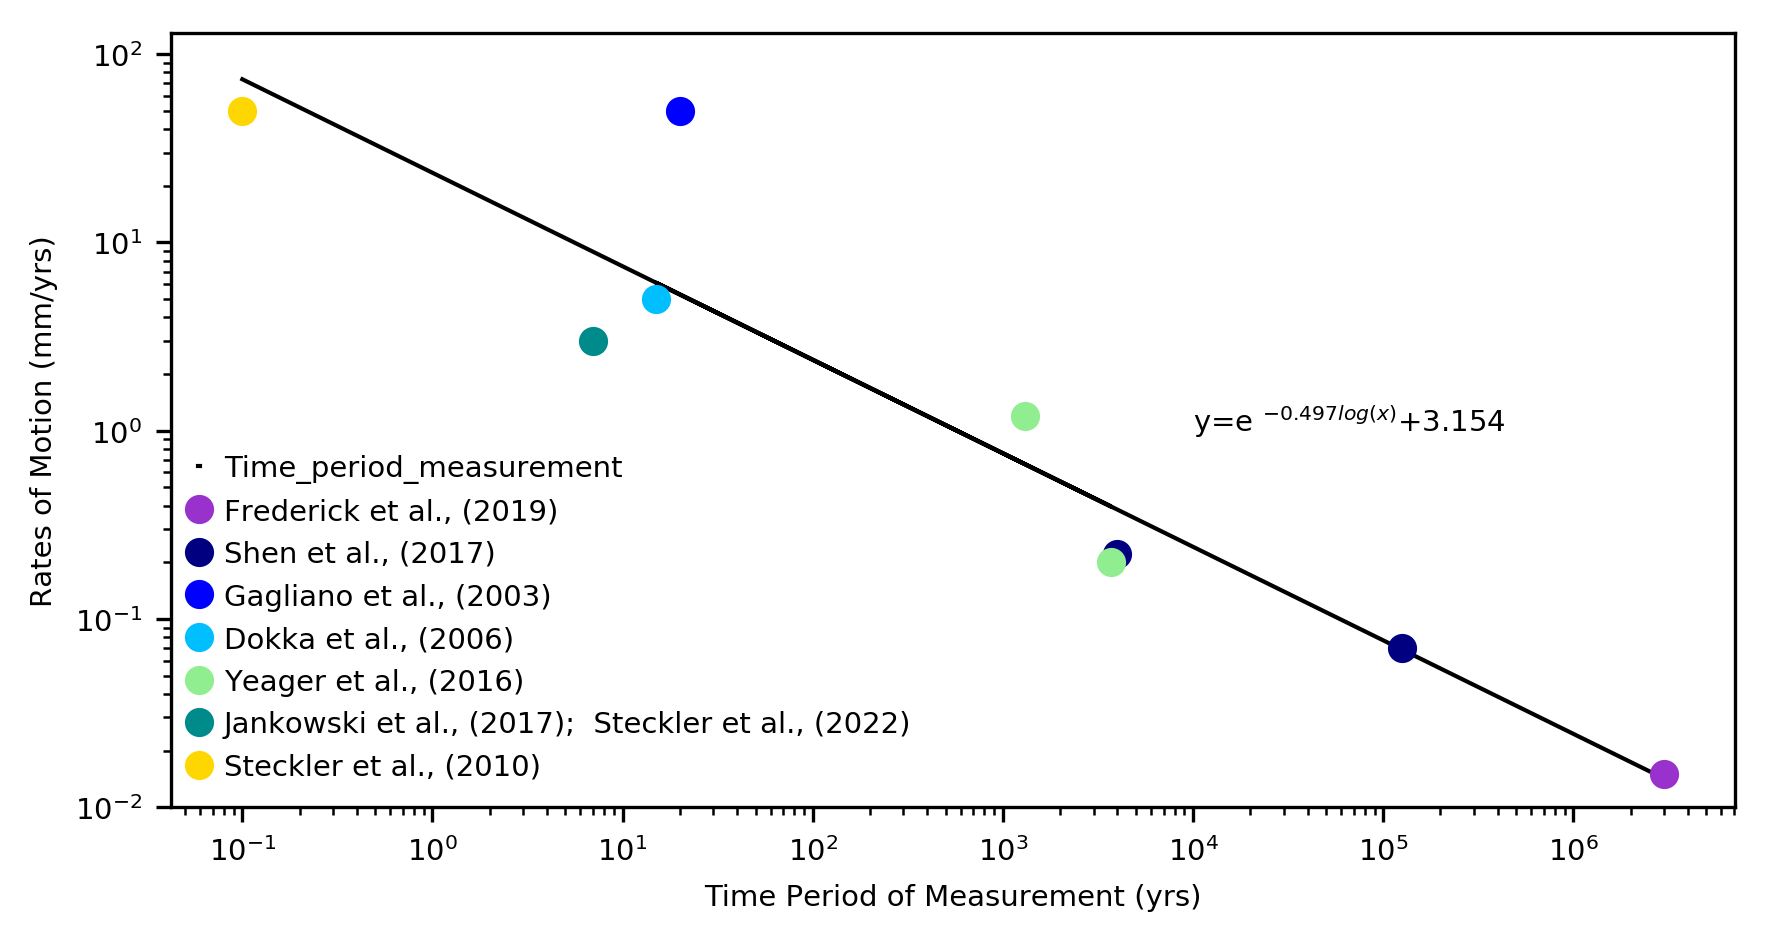

In [7]:
#Rates plot
fig = plt.figure(figsize=((15/2.54), (8/2.54)), dpi=300)
plt.rcParams['pdf.fonttype'] = 42; plt.rcParams['ps.fonttype'] = 42; plt.rc("font", size=7)

x=subsidence_rates.Time_period_measurement
y=subsidence_rates.rates_mm_yr
m, c = np.polyfit(np.log(x), np.log(y), deg=1)

y_fit= np.exp(m*np.log(x) + c) # calculate the fitted values of y 

plt.plot(x, y_fit, color='k', linewidth=1)

# colormap = plt.cm.rainbow
# color=[colormap(i) for i in np.linspace(0, 1, len(subsidence_rates.Study)+1)]

colors=['darkorchid', 'navy', 'blue', 'deepskyblue', 'lightgreen', 'darkcyan', 'gold']

for i, item in enumerate(subsidence_rates.Study):
    if i==0:
        plt.loglog(subsidence_rates.Time_period_measurement[i], subsidence_rates.rates_mm_yr[i], 'o', color=colors[i], label=subsidence_rates.Study[i])
    if i==1:
        plt.loglog(subsidence_rates.Time_period_measurement[i], subsidence_rates.rates_mm_yr[i], 'o', color=colors[i], label=subsidence_rates.Study[i])
    if i==2:
        plt.loglog(subsidence_rates.Time_period_measurement[i], subsidence_rates.rates_mm_yr[i], 'o', color=colors[i-1])
    if i==3:
        plt.loglog(subsidence_rates.Time_period_measurement[i], subsidence_rates.rates_mm_yr[i], 'o', color=colors[i-1], label=subsidence_rates.Study[i])
    if i==4:
        plt.loglog(subsidence_rates.Time_period_measurement[i], subsidence_rates.rates_mm_yr[i], 'o', color=colors[i-1],  label=subsidence_rates.Study[i])
    if i==5:
        plt.loglog(subsidence_rates.Time_period_measurement[i], subsidence_rates.rates_mm_yr[i], 'o', color=colors[i-1], label=subsidence_rates.Study[i])
    if i==6:
        plt.loglog(subsidence_rates.Time_period_measurement[i], subsidence_rates.rates_mm_yr[i], 'o', color=colors[i-2])
    if i>=7:
        plt.loglog(subsidence_rates.Time_period_measurement[i], subsidence_rates.rates_mm_yr[i], 'o', color=colors[i-2], label=subsidence_rates.Study[i])

plt.text(1e4,1,'y=e $^{'+str(np.round(m,3)) +' log (x)}$+'+ str(np.round(c,3)), fontsize=7)
plt.xlabel('Time Period of Measurement (yrs)')
plt.ylabel('Rates of Motion (mm/yrs)')
plt.ylim((1e-2, 130))

plt.legend(loc=3, labelspacing=0.5, fontsize=7, frameon=False,  handlelength=0.1)
plt.tight_layout()

fig.savefig('./images/egusphere-2023-53_Fig11_i.pdf', dpi=300)
